<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

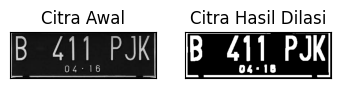

In [86]:
# Dilasi tanpa library

def dilasi_citra (F, w):
  #size image
  height, width = F.shape

  imgD = np.zeros((height, width), dtype=np.uint8)

  # Generate structure element dilasi
  sed = np.ones ((w, w), dtype=np.uint8)
  cons1 = (w-1)//2

  # Proses dilasi
  for i in range(cons1, height-cons1):
    for j in range(cons1, width-cons1):
      temp = F[i-cons1:i+cons1+1, j-cons1:j+cons1+1]
      product = temp*sed
      imgD[i, j] = np.max(product)
  return imgD

img1 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img1, 125, 200, cv.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img1, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

[[1 1 1]
 [1 1 1]
 [1 1 1]]


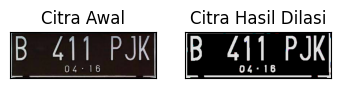

In [87]:
img2 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg')
ret, thresh = cv.threshold(img2, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint16)
dilasi = cv.dilate(thresh, kernel, iterations=1)
print(kernel)

plt.subplot(131), plt.imshow(img2, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilasi, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

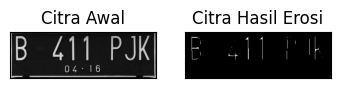

In [88]:
# Erosi tanpa library

def erosi_citra(F, k):
  #size image
  height, width = F.shape

  imgE = np.zeros((height, width), dtype=np.uint8)

  # Generate structure element erosi
  se = np.ones ((k, k), dtype=np.uint8)
  cons1 = (k-1)//2

  # Proses erosi
  for i in range(cons1, height-cons1):
    for j in range(cons1, width-cons1):
      temp = F[i-cons1:i+cons1+1, j-cons1:j+cons1+1]
      product = temp*se
      imgE[i, j] = np.min(product)
  return imgE

img3 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret1, thresh1 = cv.threshold(img3, 127, 225, cv.THRESH_BINARY)
k = 5
imgE = erosi_citra(thresh1, k)

plt.subplot(131), plt.imshow(img3, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

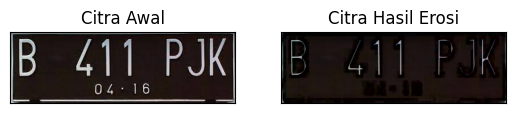

In [89]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg')

kernel = np.ones((5,5), np.uint8)
dilasi = cv.erode(img4, kernel, iterations=1)

plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilasi, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

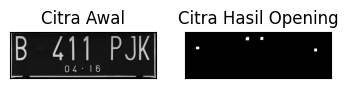

In [90]:
# Opening tanpa library

img5 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
reto, thresho = cv.threshold(img5, 127, 225, cv.THRESH_BINARY)
k = 7

imgO = dilasi_citra(erosi_citra(thresho, k), k)

plt.subplot(131), plt.imshow(img5, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

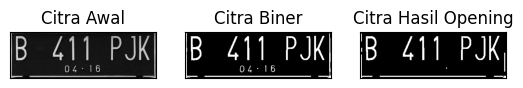

In [91]:
# Opening menggunakan library
img6 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img6, 127, 255, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
open = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)

plt.subplot(131), plt.imshow(img6, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(open, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

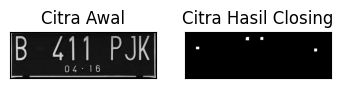

In [92]:
# Closing tanpa library

img7 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
retc, threshc = cv.threshold(img7, 127, 225, cv.THRESH_BINARY)
k = 7

imgC = erosi_citra(dilasi_citra(thresho, k), k)

plt.subplot(131), plt.imshow(img7, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgO, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

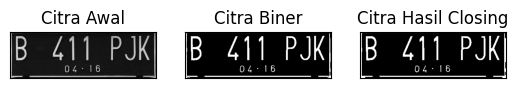

In [93]:
# Closing menggunakan library
img7 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img7, 127, 255, cv.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img7, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(thresh, cmap='gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(close, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

SED = Cross 3


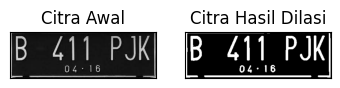

SED = Cross 5


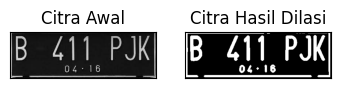

In [94]:
# Dilasi Cross SED

def dilasi_citra (F, w):
  #size image
  height, width = F.shape

  imgD = np.zeros((height, width), dtype=np.uint8)

  # Generate structure element dilasi
  sed = np.array ([
      [0, 1, 0],
      [1, 1, 1],
      [0, 1, 0]
  ], dtype=np.uint8)
  cons1 = (w-1)//2

  # Proses dilasi
  for i in range(cons1, height-cons1):
    for j in range(cons1, width-cons1):
      temp = F[i-cons1:i+cons1+1, j-cons1:j+cons1+1]
      product = temp*sed
      imgD[i, j] = np.max(product)
  return imgD

print('SED = Cross 3')
img8 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img8, 127, 255, cv.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img8, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

def dilasi_citra (F, w):
  #size image
  height, width = F.shape

  imgD = np.zeros((height, width), dtype=np.uint8)

  # Generate structure element dilasi
  sed = np.array ([
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0],
      [1, 1, 1, 1, 1],
      [0, 0, 1, 0, 0],
      [0, 0, 1, 0, 0]
  ], dtype=np.uint8)
  cons1 = (w-1)//2

  # Proses dilasi
  for i in range(cons1, height-cons1):
    for j in range(cons1, width-cons1):
      temp = F[i - cons1:i + cons1 + 1, j - cons1:j + cons1 + 1]
      product = temp*sed
      imgD[i, j] = np.max(product)
  return imgD

print('SED = Cross 5')
img9 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img9, 127, 255, cv.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img9, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

SED = Cross 3


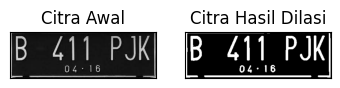

SED = Cross 5


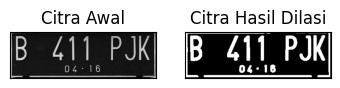

In [95]:
# Dilasi Circular SED

def dilasi_citra (F, w):
  #size image
  height, width = F.shape

  imgD = np.zeros((height, width), dtype=np.uint8)

  # Generate structure element dilasi
  sed = cv.getStructuringElement(cv.MORPH_ELLIPSE, (w, w))
  cons1 = (w-1)//2

  # Proses dilasi
  for i in range(cons1, height-cons1):
    for j in range(cons1, width-cons1):
      temp = F[i - cons1:i + cons1 + 1, j - cons1:j + cons1 + 1]
      product = temp*sed
      imgD[i, j] = np.max(product)
  return imgD

print('SED = Cross 3')
img10 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img10, 127, 255, cv.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img10, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SED = Cross 5')
img11 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img11, 127, 255, cv.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh, w)

plt.subplot(131), plt.imshow(img11, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgD, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = rectangle 3x5


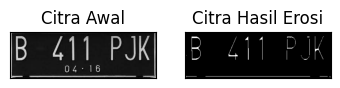

SE = rectangle 5x7


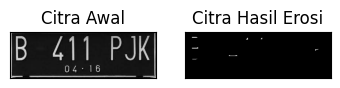

In [96]:
# Erosi Cross SE

def erosi_citra(F, p, l):
  height, width = F.shape

  #Generate structure element erosi (SE)
  se = cv.getStructuringElement(cv.MORPH_RECT,(p,l)) #SE persegi panjang
  cons1 = (l-1)//2
  cons2 = (p-1)//2

  imgE = np.zeros((height, width), dtype=np.uint8)
  for i in range(cons1, height-cons1):
    for j in range(cons2, width-cons2):
      temp = F[i - cons1:i + cons1 + 1, j - cons2:j + cons2 + 1]
      product = temp*se
      imgE[i, j] = np.min(product)
  return imgE

print('SE = rectangle 3x5')
img12 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img12, 127, 255, cv.THRESH_BINARY)
p = 5
l = 3
imgE = erosi_citra(thresh, p, l)

plt.subplot(131), plt.imshow(img12, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = rectangle 5x7')
img13 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img13, 127, 255, cv.THRESH_BINARY)
p = 7
l = 5
imgE = erosi_citra(thresh, p, l)

plt.subplot(131), plt.imshow(img13, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 3


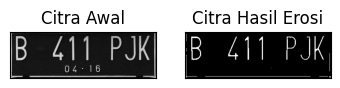

SE = Line Vertikal 5


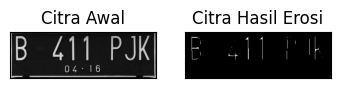

In [97]:
# Erosi Line Vertikal SE

def erosi_citra(F, k):
  height, width = F.shape

  #Generate structure element erosi (SE)
  se = cv.getStructuringElement(cv.MORPH_RECT,(1, k)) #SE persegi panjang
  cons = (k-1)//2

  imgE = np.zeros((height, width), dtype=np.uint8)
  for i in range(cons, height-cons):
    for j in range(cons, width-cons):
      temp = F[i - cons:i + cons + 1, j - cons:j + cons + 1]
      product = temp*se
      imgE[i, j] = np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img13 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img13, 127, 255, cv.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh, k)

plt.subplot(131), plt.imshow(img13, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img14 = cv.imread('/content/drive/MyDrive/PCVK/img/plat.jpeg', 0)
ret, thresh = cv.threshold(img14, 127, 255, cv.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh, k)

plt.subplot(131), plt.imshow(img14, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(imgE, cmap='gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

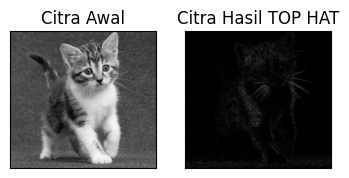

In [98]:
# TopHat
filterSize = (3, 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, filterSize)

img15 = cv.imread('/content/drive/MyDrive/PCVK/img/kitten01.jpg')
img15 = cv.cvtColor(img15, cv.COLOR_BGR2GRAY)

tophatImg = cv.morphologyEx(img15, cv.MORPH_TOPHAT, kernel)

plt.subplot(131),plt.imshow(img15,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophatImg,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()


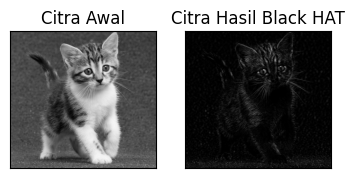

In [99]:
# Blackhat
img16 = cv.imread('/content/drive/MyDrive/PCVK/img/kitten01.jpg')
img16 = cv.cvtColor(img16, cv.COLOR_BGR2GRAY)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))
tophatImg = cv.morphologyEx(img16, cv.MORPH_TOPHAT, kernel)

plt.subplot(131),plt.imshow(img16,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophatImg,cmap = 'gray')
plt.title('Citra Hasil Black HAT'), plt.xticks([]), plt.yticks([])
plt.show()


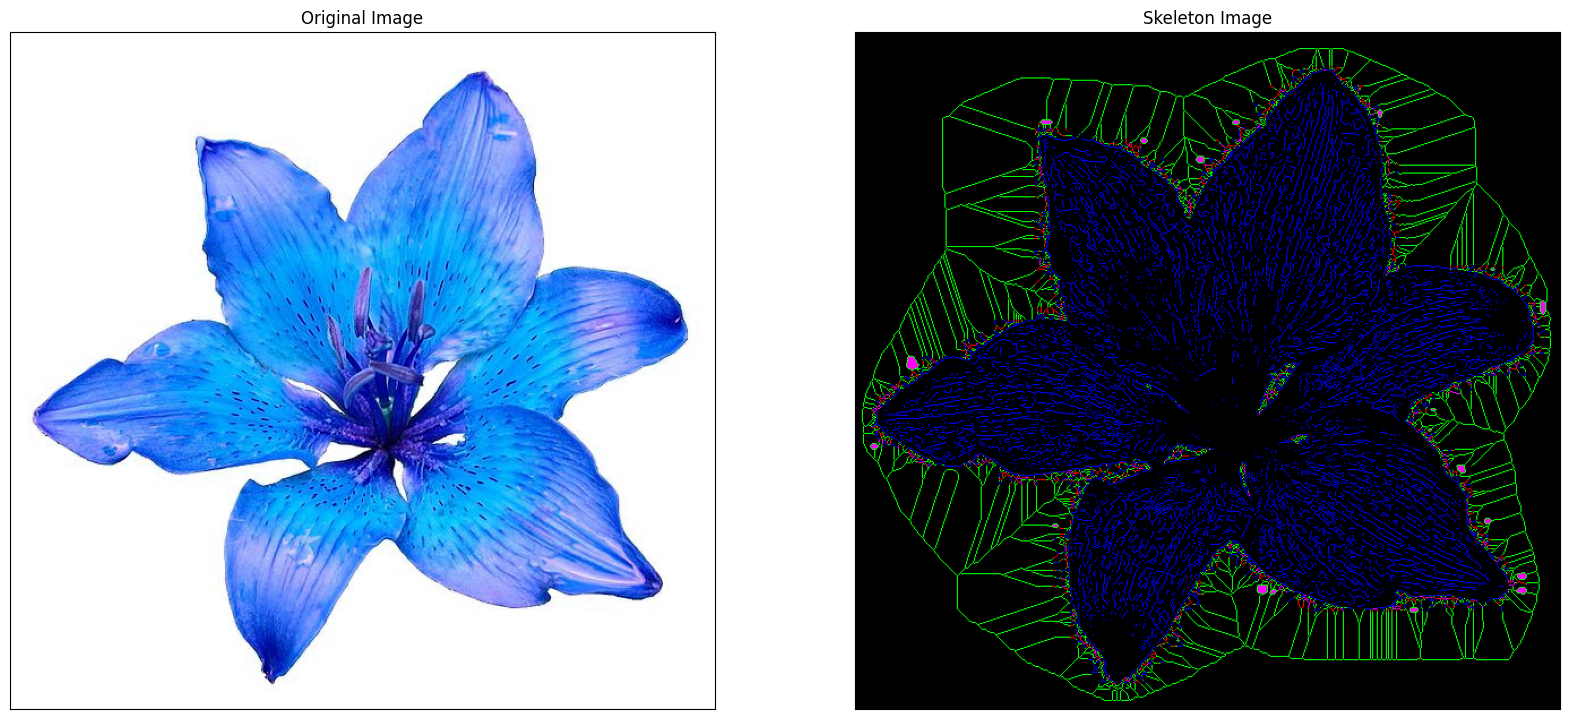

In [100]:
# Skeleton
import matplotlib.pyplot as plt  # Import pyplot from matplotlib

from skimage import filters
from skimage.morphology import skeletonize

img17 = cv.imread('/content/drive/MyDrive/PCVK/img/lily.jpg')

binary = img17 > filters.threshold_triangle(img17)

# True False to 1
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# Skeletonize image
skeleton = skeletonize(binary_cp)

# Print image
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img17, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary_and_bin_skeleton.png")
plt.show()


# **Tugas**

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.

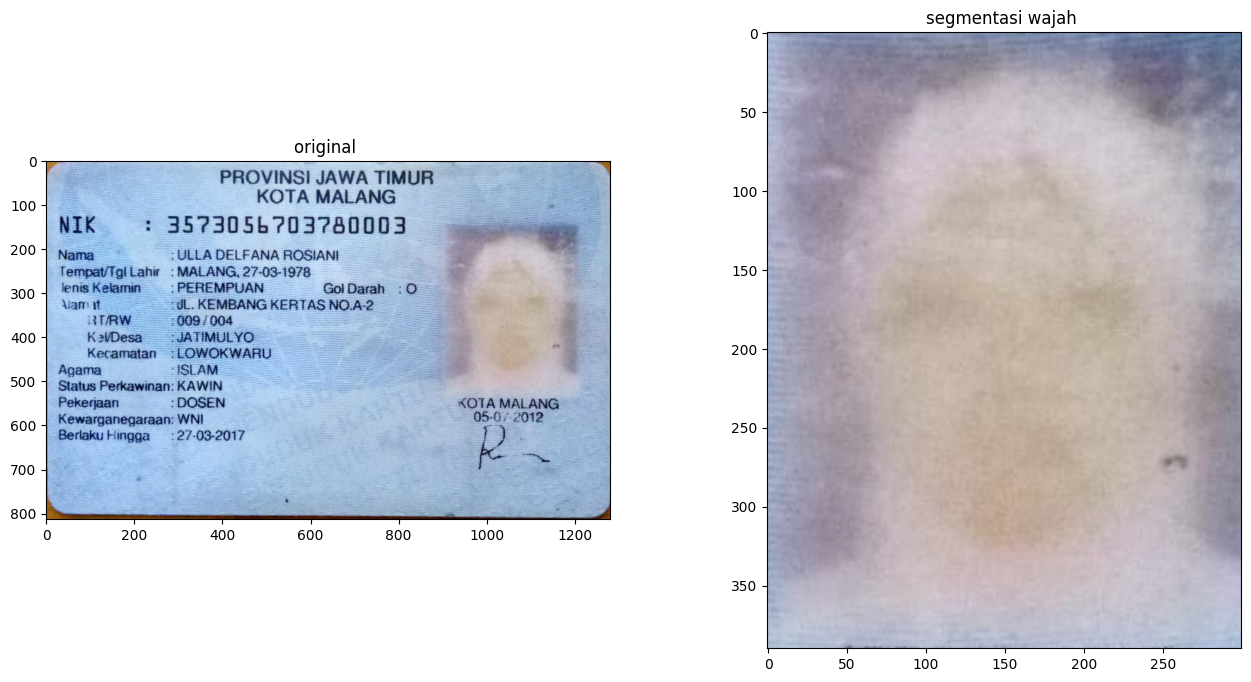

In [104]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/img/KTP_More/KTP rosi.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
# mask = np.zeros(ktp.shape, dtype=np.uint8)
# mask = cv.rectangle(mask, (900, 150), (1200, 540), (255, 255, 255), -1)

# masked = ktp & mask
# masked[mask==0] = 255

x1, y1, x2, y2 = 900, 150, 1200, 540
segmentasi = ktp[y1:y2, x1:x2]

# final_frame = cv.hconcat((ktp, masked))
# plt.imshow(ktp)
# cv2_imshow(final_frame)

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.title("original ")
plt.imshow(ktp)

plt.subplot(1,2,2)
plt.title("segmentasi wajah ")
plt.imshow(segmentasi)
plt.show()

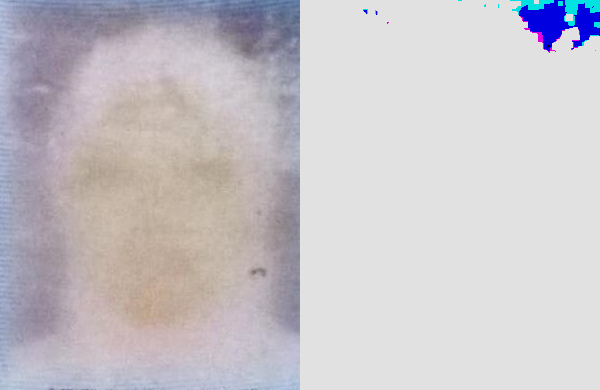

In [109]:
img2 = segmentasi
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
ret, thresh = cv.threshold(img2, 127, 225, cv.THRESH_BINARY)
kernel = np.ones((5,5), np.uint16)
dilasi = cv.dilate(thresh, kernel, iterations=1)

result = cv.hconcat((img2, dilasi))
cv2_imshow(result)